In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [8]:
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.817592
1,1.728012
2,1.912330
3,0.454663
4,2.013601


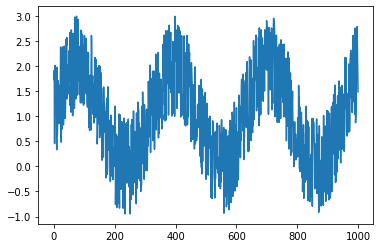

In [9]:
plt.plot(df)
plt.show()

In [10]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [11]:
test

array([[ 0.19433365],
       [ 0.97356072],
       [ 0.41152252],
       [ 0.1988234 ],
       [ 1.61268681],
       [ 1.2330202 ],
       [ 1.37202615],
       [-0.04681299],
       [ 1.18461397],
       [-0.10467796],
       [ 0.90495631],
       [-0.07516429],
       [-0.02641004],
       [ 1.07706146],
       [ 0.73377065],
       [-0.22107212],
       [ 0.71704723],
       [-0.50127023],
       [-0.0502129 ],
       [-0.0632069 ],
       [ 0.82938408],
       [-0.63906961],
       [-0.38039536],
       [ 0.43526825],
       [ 0.23875063],
       [-0.24454031],
       [-0.31478701],
       [ 0.65375255],
       [ 0.11650503],
       [ 1.19870229],
       [-0.26695172],
       [ 0.91606492],
       [ 0.82824404],
       [ 0.45393232],
       [ 0.8918831 ],
       [-0.68678843],
       [-0.08652542],
       [ 0.79107256],
       [-0.39330425],
       [ 0.15113269],
       [-0.6236624 ],
       [-0.7016007 ],
       [-0.41713576],
       [-0.62325635],
       [-0.12574341],
       [ 0

In [12]:
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [13]:
test

array([ 0.19433365,  0.97356072,  0.41152252,  0.1988234 ,  1.61268681,
        1.2330202 ,  1.37202615, -0.04681299,  1.18461397, -0.10467796,
        0.90495631, -0.07516429, -0.02641004,  1.07706146,  0.73377065,
       -0.22107212,  0.71704723, -0.50127023, -0.0502129 , -0.0632069 ,
        0.82938408, -0.63906961, -0.38039536,  0.43526825,  0.23875063,
       -0.24454031, -0.31478701,  0.65375255,  0.11650503,  1.19870229,
       -0.26695172,  0.91606492,  0.82824404,  0.45393232,  0.8918831 ,
       -0.68678843, -0.08652542,  0.79107256, -0.39330425,  0.15113269,
       -0.6236624 , -0.7016007 , -0.41713576, -0.62325635, -0.12574341,
        0.24257403, -0.49488   ,  0.85071515,  0.95129142, -0.79429244,
        0.44909312,  0.95547899,  0.70224609,  0.88285264,  0.81938463,
        0.51046795,  0.27410583, -0.44766284,  0.2017292 ,  0.44422907,
        0.10343609, -0.21379431, -0.14645844,  0.94559558, -0.53776617,
       -0.45306317,  0.2198198 , -0.52321284,  0.63669734, -0.24

In [14]:
# convert into dataset matrix
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [15]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [16]:
testX,testY

(array([[ 0.19433365,  0.97356072,  0.41152252,  0.1988234 ],
        [ 0.97356072,  0.41152252,  0.1988234 ,  1.61268681],
        [ 0.41152252,  0.1988234 ,  1.61268681,  1.2330202 ],
        [ 0.1988234 ,  1.61268681,  1.2330202 ,  1.37202615],
        [ 1.61268681,  1.2330202 ,  1.37202615, -0.04681299],
        [ 1.2330202 ,  1.37202615, -0.04681299,  1.18461397],
        [ 1.37202615, -0.04681299,  1.18461397, -0.10467796],
        [-0.04681299,  1.18461397, -0.10467796,  0.90495631],
        [ 1.18461397, -0.10467796,  0.90495631, -0.07516429],
        [-0.10467796,  0.90495631, -0.07516429, -0.02641004],
        [ 0.90495631, -0.07516429, -0.02641004,  1.07706146],
        [-0.07516429, -0.02641004,  1.07706146,  0.73377065],
        [-0.02641004,  1.07706146,  0.73377065, -0.22107212],
        [ 1.07706146,  0.73377065, -0.22107212,  0.71704723],
        [ 0.73377065, -0.22107212,  0.71704723, -0.50127023],
        [-0.22107212,  0.71704723, -0.50127023, -0.0502129 ],
        

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

In [18]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)



Epoch 1/100
 - 0s - loss: 0.5393
Epoch 2/100
 - 0s - loss: 0.4170
Epoch 3/100
 - 0s - loss: 0.4045
Epoch 4/100
 - 0s - loss: 0.3989
Epoch 5/100
 - 0s - loss: 0.3964
Epoch 6/100
 - 0s - loss: 0.3910
Epoch 7/100
 - 0s - loss: 0.3904
Epoch 8/100
 - 0s - loss: 0.3865
Epoch 9/100
 - 0s - loss: 0.3882
Epoch 10/100
 - 0s - loss: 0.3885
Epoch 11/100
 - 0s - loss: 0.3869
Epoch 12/100
 - 0s - loss: 0.3846
Epoch 13/100
 - 0s - loss: 0.3859
Epoch 14/100
 - 0s - loss: 0.3824
Epoch 15/100
 - 0s - loss: 0.3811
Epoch 16/100
 - 0s - loss: 0.3842
Epoch 17/100
 - 0s - loss: 0.3829
Epoch 18/100
 - 0s - loss: 0.3825
Epoch 19/100
 - 0s - loss: 0.3805
Epoch 20/100
 - 0s - loss: 0.3812
Epoch 21/100
 - 0s - loss: 0.3797
Epoch 22/100
 - 0s - loss: 0.3791
Epoch 23/100
 - 0s - loss: 0.3793
Epoch 24/100
 - 0s - loss: 0.3810
Epoch 25/100
 - 0s - loss: 0.3800
Epoch 26/100
 - 0s - loss: 0.3762
Epoch 27/100
 - 0s - loss: 0.3770
Epoch 28/100
 - 0s - loss: 0.3779
Epoch 29/100
 - 0s - loss: 0.3772
Epoch 30/100
 - 0s - 

In [20]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.34663586139678954


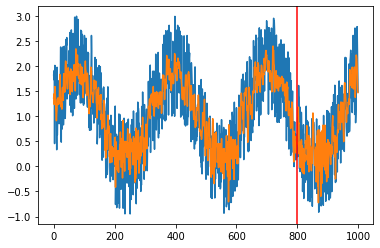

In [21]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()